# Simulazione d'esame Laboratorio di Programmazione 2

## Esercizio 1

1. Crea un vettore NumPy con i seguenti **canoni mensili d'affitto** (in euro) per 4 appartamenti: **720, 980, 650, 1200**

2. Calcola la **spesa totale mensile** sostenuta dagli inquilini.

3. Il proprietario dell'appartamento da **1200 €** decide di **aumentare l’affitto del 12%**.
    - Modifica il vettore per applicare l’aumento.
    - L’importo aggiornato deve essere esattamente **1344,00 €**, controlla se appare **esattamente** nel tuo array.


4. L'inquilino dell'appartamento da **650 €** ottiene uno **sconto del 10%**.
    - Applica la modifica.

5. Gli altri due appartamenti (**720 € e 980 €**) subiscono un **aumento del 5%**.
    - Aggiorna il vettore di conseguenza.

7. Calcola la **nuova spesa totale mensile** dopo tutti i cambiamenti.

8. Infine: quanto ha influito **l’aumento dell’affitto più alto** sulla spesa complessiva?

    (Suggerimento: confronta la spesa totale **prima di qualsiasi modifica** e **dopo il solo aumento del canone a 1200 €**.)


In [ ]:
import numpy as np

#1)
rent = np.array([720, 980, 650, 1200])

#2)
tot_rent = np.sum(rent)

#3)
rent = np.where(rent  ==  1200, rent * (1 + 12/100), rent)
np.isclose(rent, 1344).any()

#4)
rent = np.where(rent  ==  650, rent * (1 + 10/100), rent)

#5)
rent = np.where(rent  ==  720, rent * (1 + 5/100), rent)
rent = np.where(rent  ==  980, rent * (1 + 5/100), rent)

#6)
new_tot_rent = np.sum(rent)

#7)
diff = new_tot_rent - tot_rent

294.0


## Esercizio 2

Consideriamo un semplice processo di random walk (cammino aleatorio) in una dimensione:
a ogni passo temporale, un camminatore si sposta a destra (+1) o a sinistra (-1) con uguale probabilità. Supponiamo che il camminatore parta sempre da x=0.

1. Scrivi una funzione che simula il cammino per n passi ed N camminatori e restituisce due array. Il primo rappresenta la media della posizione ad ogni passo degli N camminatori ed il secondo la deviazione standard della posizione ad ogni passo degli N camminatori.

2. Fai prima il plot della media delle posizione degli N camminatori per 100 passi 

3. Fai il plot con anche la devizione standard.  La deviazione standard diminuisce all'aumentare del campione? Che andamento ha la deviazione standard rispeto l tempo/passi?

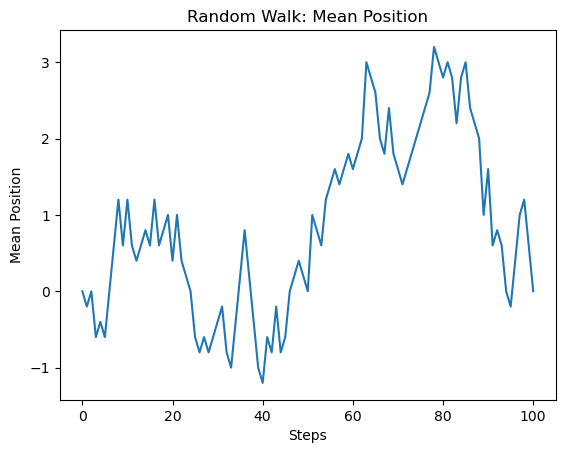

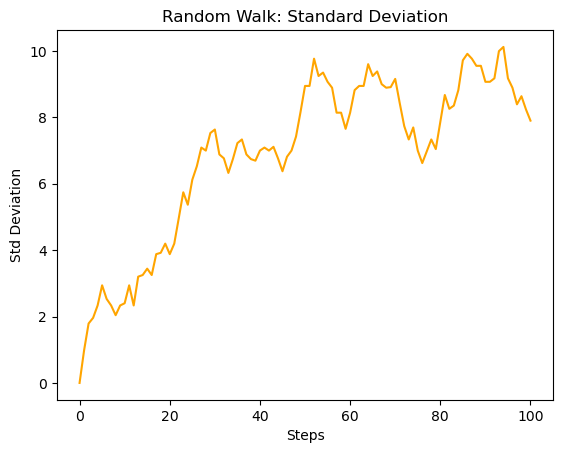

In [31]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

#1)
def random_walk(walks, N):

    steps_array = np.random.choice([-1, 1], size=(N, walks))

    positions = np.cumsum(steps_array, axis=1)
    positions = np.hstack((np.zeros((N, 1)), positions)) 

    mean_array = np.mean(positions, axis=0)
    std_array = np.std(positions, axis=0)

    return mean_array, std_array

mean_arr, std_arr = random_walk(100, 5) 

#2)
x = np.arange(101)

plt.plot(x, mean_arr, label='Mean Position')
plt.title('Random Walk: Mean Position')
plt.xlabel('Steps')
plt.ylabel('Mean Position')
plt.show()

#3)
#La std si stabilizza e ha un'andamento simil radice

plt.plot(x, std_arr, label='Standard Deviation', color='orange')
plt.title('Random Walk: Standard Deviation')
plt.xlabel('Steps')
plt.ylabel('Std Deviation')
plt.show()

## Esercizio 3

Genera un array `a` di dimensioni **5 x 9** contenente numeri da una distribuzione gaussiana con media 0 e dev standard 1.  
Per ogni riga, seleziona il numero **più vicino a 0.1**.
Imposta il seed per la riproducibilità `np.random.seed(42)`

 *Suggerimento*: per ottenere `a[i, j]`, l'array `i` deve contenere gli **indici di riga** corrispondenti agli elementi in `j`.


In [5]:
import numpy as np

#1)
np.random.seed(42)

mtx = np.random.normal(0, 1, 45).reshape(5,9)

#2)
args = np.argmin(np.abs(mtx - 0.1), axis = 1)
mtx[np.arange(5), args].reshape(5, 1)


array([[-0.1382643 ],
       [ 0.24196227],
       [ 0.11092259],
       [-0.01349722],
       [ 0.17136828]])

## Esercizio 4

Utilizza il dataset `titanic`, disponibile all'url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

Esegui un’analisi esplorativa sui dati dei passeggeri, focalizzandoti su tariffe, età e componenti familiari.

1. **Visualizza i primi 10 passeggeri ordinati per tariffa pagata** (`Fare`), dal più alto al più basso.

2. **Calcola la media** di:
   - `Age` (età)
   - `Fare` (tariffa)
   - `SibSp` (numero di fratelli/coniugi a bordo)

3. **Crea una nuova colonna** chiamata `Family_index`, definita come:

   $$
   \texttt{family\_index} = \frac{\texttt{sibsp} + \texttt{parch}}{\texttt{fare}}
   $$

   *(Indicatore del “peso familiare” per unità di spesa – attenzione a eventuali divisioni per zero!)*

4. Trova il **passeggero con il valore massimo** di `Family_index`.

5. **Filtra solo i passeggeri** che hanno pagato **più di 100** di tariffa (`Fare > 100`).

6. **Crea un grafico a barre** con i 10 passeggeri che hanno pagato di più (`Fare`).

7. **Crea un grafico a linee** dell’età (`Age`), ordinando i passeggeri per tariffa (`Fare`) crescente.



💡 *Suggerimenti*:
- Ricordati di gestire eventuali valori mancanti in `Age` o `Fare` prima di fare operazioni.


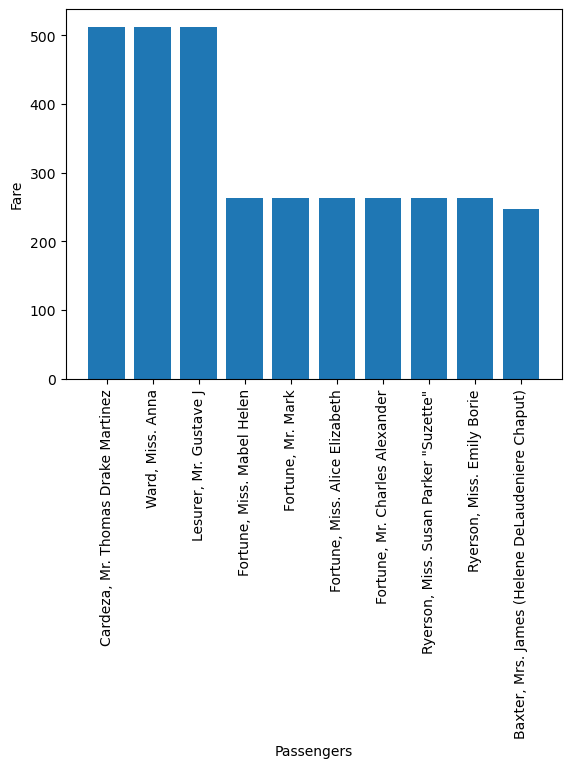

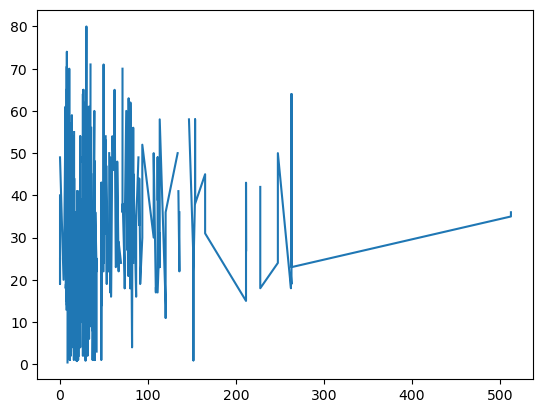

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

#1)
df.sort_values(by = "Fare", ascending = False).head(10)

#2)
np.mean(df["Age"])
np.mean(df["Fare"])
np.mean(df["SibSp"])

#3)
family_index = (df["SibSp"] + df["Parch"]) / df["Fare"].replace(0, np.nan)
df["Family_index"] = family_index
df["Family_index"].fillna(0)

#4)
df.loc[df["Family_index"].idxmax()]

#5)
df[df["Fare"] > 100]

#6)
most_fare = df.sort_values(by = "Fare", ascending = False).head(10)
plt.bar(most_fare["Name"], most_fare["Fare"])
plt.xlabel("Passengers")
plt.ylabel("Fare")
plt.xticks(rotation=90)
plt.show()

#7)
fares = df.sort_values(by = "Fare", ascending = False)[["Fare"]] 
ages = df.sort_values(by = "Fare", ascending = False)[["Age"]]

plt.plot(fares, ages)
plt.show()

## Esercizio 5

Usa il dataset `penguins`, disponibile tramite `seaborn.load_dataset("penguins")`.


1. Quante righe e colonne ha il dataset?

2. Controlla quanti valori mancanti ci sono per colonna.

3. Riempi i valori mancanti nella colonna `sex` con il valore più frequente.

4. Rimuovi le righe in cui il valore `body_mass_g` è mancante.

5. Controlla se ci sono righe duplicate.

6. Calcola la **massa corporea media** (`body_mass_g`) per ogni specie (`species`).
  Se ci sono valori mancanti in `body_mass_g`, riempili con la media della specie.

7. Visualizza la **distribuzione della massa corporea** (`body_mass_g`) per specie.

8.  Visualizza la **distribuzione della massa corporea** per specie, **dividendo per sesso** (`sex`) e mostrandoli a confronto.


💡 Suggerimento: usa `seaborn.violinplot()`, `boxplot()` o `kdeplot()` con `hue='sex'`.


Nan in species: 0
Nan in island: 0
Nan in bill_length_mm: 2
Nan in bill_depth_mm: 2
Nan in flipper_length_mm: 2
Nan in body_mass_g: 2
Nan in sex: 11
Ci sono righe duplicate


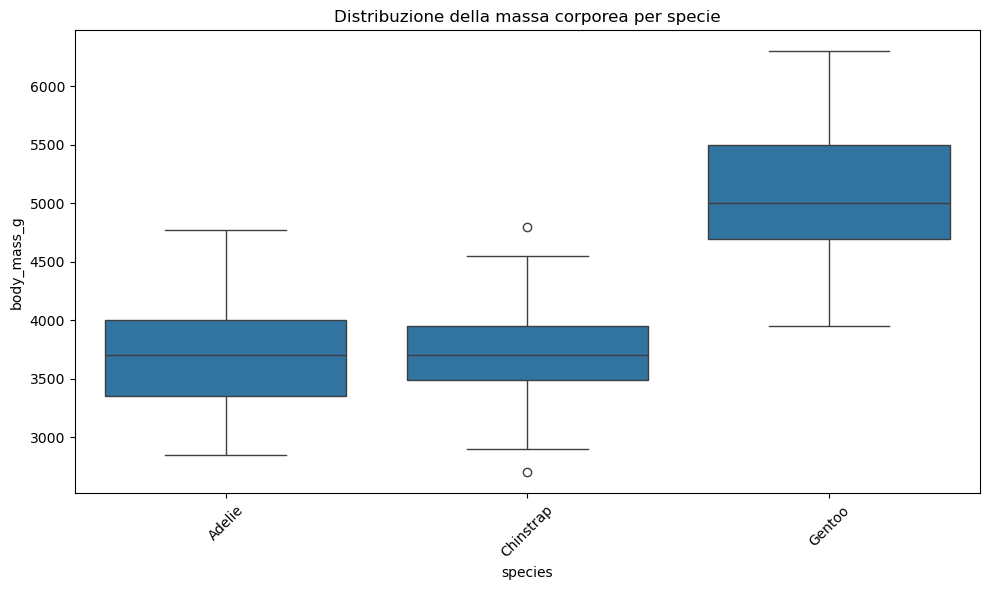

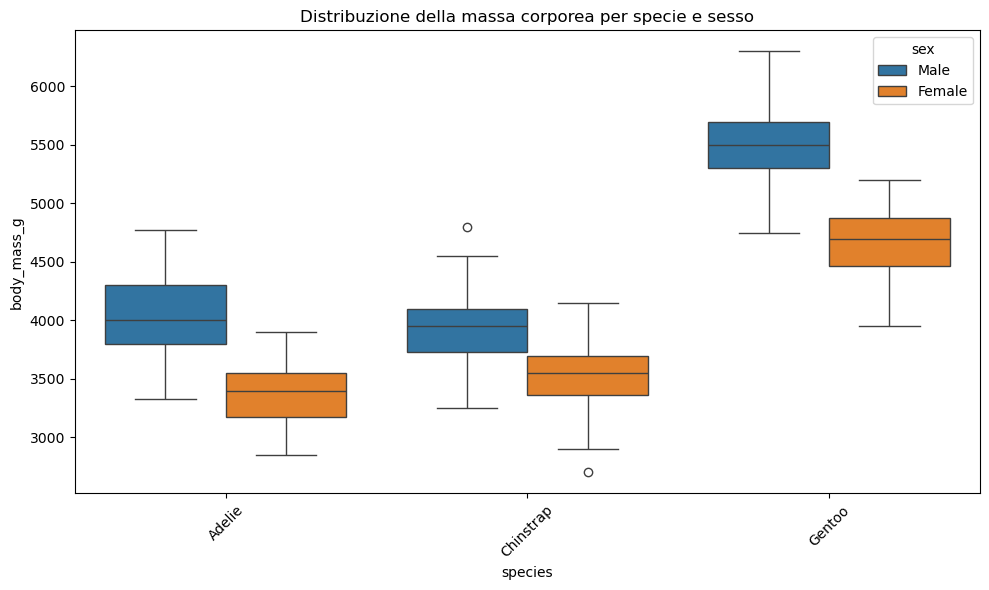

In [ ]:
import seaborn
import pandas as pd
import matplotlib.pyplot as plt

df = seaborn.load_dataset("penguins")

#1)
df = pd.DataFrame(df)
df.shape

#2)
for col in df.columns:
    print("Nan in {}: {}".format(col, df[col].isna().sum()))

#3)
df["sex"].fillna(df["sex"].mode()[0])

#4)
df = df.dropna(subset=["body_mass_g"])

#5)
if(df.duplicated().sum()  ==  0):
    print("Ci sono righe duplicate")
else:
    print("Non ci sono righe duplicate")

#6)
body_mass_species = df.groupby("species")[["body_mass_g"]].mean()

#7)
plt.figure(figsize=(10,6))
seaborn.boxplot(data=df, x="species", y="body_mass_g")
plt.title("Distribuzione della massa corporea per specie")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#8)
plt.figure(figsize=(10,6))
seaborn.boxplot(data=df, x="species", y="body_mass_g", hue="sex")
plt.title("Distribuzione della massa corporea per specie e sesso")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Esercizio 6

Hai due array NumPy generati come segue:

`x = np.linspace(0, 10, 100)`  
`y = 3 * x + 2 + np.random.normal(0, 1, 100)`

Scrivi una funzione `fit_line(x, y)` che:

- usa `scipy.optimize.curve_fit` per eseguire un **fitting lineare** del tipo `y = a * x + b`;  
- restituisce una tupla contenente:
  - i **parametri ottimizzati** `a` e `b`;  
  - una **stringa** che descrive la retta trovata, ad esempio: `"y = 3.02 * x + 1.95"`.


Esempio di output atteso:   (3.02, 1.95, "y = 3.02 * x + 1.95")

Fai un esempio di utilizzo dove poi plotti i dati e la curva ottenuta.


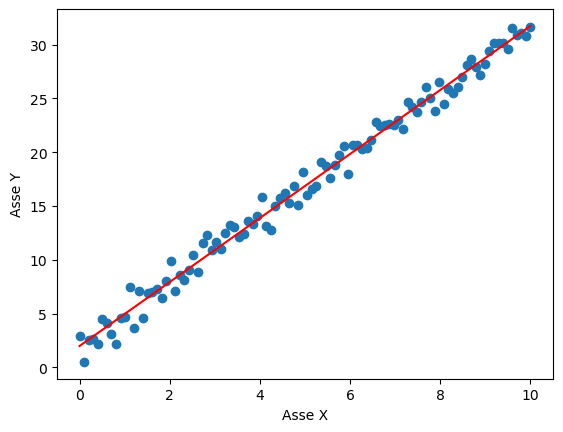

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#1)
x = np.linspace(0, 10, 100)
y = 3 * x + 2 + np.random.normal(0, 1, 100)

def linear(x, a, b):
    return a * x + b

def fit_line(x,y):

    args, _ = sp.optimize.curve_fit(linear, x, y)
    a,b = args

    return (a,b,"y = {} * x + {}".format(a, b))

#2)
x_reshaped = x.reshape(-1, 1)

linear_model = LinearRegression()
linear_model.fit(x_reshaped, y)

y_pred = linear_model.predict(x_reshaped)

plt.scatter(x,y)
plt.plot(x, y_pred, color = "RED")
plt.xlabel("Asse X")
plt.ylabel("Asse Y")
plt.show()
